In [2]:
# Libraries for data loading
import lasio
import pandas as pd
import os

# Libraries for data visualization:
import matplotlib.pyplot as plt
import seaborn as sns
    

In [7]:
las_file_list = []
path = 'E:/development/curso-big-data/registros/'
files = os.listdir(path)

for file in files:
    if file.lower().endswith('.las'):
        las_file_list.append(path + file)
        


In [5]:
df_list_header = []


for lasfile in las_file_list:
    welldict = {}
    las = lasio.read(lasfile)
    welldict['WELL']= las.well.WELL.value
    welldict['FLD']= las.well.FLD.value
    welldict['STRT']= las.well.STRT.value
    welldict['STOP']= las.well.STOP.value
    welldict['COMP']= las.well.COMP.value
    welldict['SRVC']= las.well.SRVC.value
    welldict['LOC']= las.well.LOC.value
    welldict['DATE']= las.well.DATE.value
    
    
        
    df_list_header.append(welldict)

dfheader = pd.DataFrame(df_list_header)

dfheader

,WELL,FLD,STRT,STOP,COMP,SRVC,LOC,DATE
0,NO_15/9-19_BT2,,3768.0900,4249.8264,,,,
1,NO_15/9-19_SR,,3549.7008,4618.3296,,,,
2,15/9-F-12,VOLVE,3034.8935,3257.5776,STATOIL,UNKNOWN,UNKNOWN,UNKNOWN
3,15/9-F-12,VOLVE,3017.9700,3252.3645,STATOIL,UNKNOWN,UNKNOWN,UNKNOWN
4,15/9-F-12,VOLVE,3057.9099,3250.2519,STATOIL,UNKNOWN,UNKNOWN,UNKNOWN
...,...,...,...,...,...,...,...,...
102,15/9-F-12,Volve,3135.0500,3039.9000,Statoil,Halliburton Logging Services,,Wed Nov 26 21-01-09 2014
103,15/9-F-1-C,VOLVE,3785.6000,3572.2000,STATOIL,Halliburton Logging Services,,Wed Dec 03 05-47-41 2014
104,15/9-F-1-C,VOLVE,3779.9000,3659.5000,STATOIL,Halliburton Logging Services,,Wed Dec 03 07-18-31 2014
105,15/9-F-1-C,VOLVE,3782.3500,3681.1500,STATOIL,Halliburton Logging Services,,Thu Dec 04 04-49-02 2014


<AxesSubplot:ylabel='WELL'>

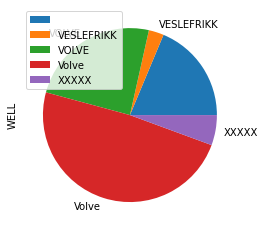

In [96]:
dfg = dfheader.groupby('FLD',as_index=True).agg({"WELL":"count"})
dfg.plot(x="FLD",y="WELL",kind="pie")

<AxesSubplot:xlabel='SRVC'>

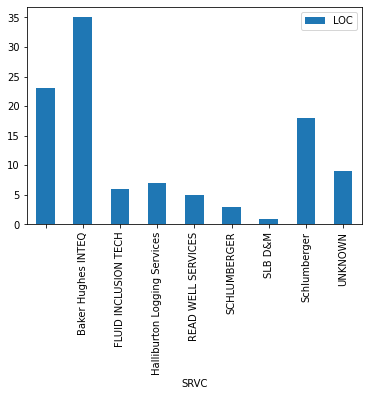

In [93]:

dfg = dfheader.groupby('SRVC',as_index=True).agg({"LOC":"count"})
dfg.plot.bar()

In [98]:
dfheader.to_csv("headers.csv")